# Práctico 7 - Procesamiento Digital de Imágenes

1. Downsampling x2 
2. Upsampling x2  

utilizando los  métodos con kernel:
 con kernel 
 constante
 bilineal
 bicúbico


In [1]:
#%% Importación de Libs
import imageio.v2 as imageio
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import copy
#%matplotlib inline

In [2]:
def remuestreo_downx2(img):
    img_out = copy.deepcopy(img)
    return img_out[::2,::2]

def muestreo_downx2(img,tipo):
    #tipo ={'nn','promedio','bilineal'}
    (rows,cols)=img.shape
    img_out = np.zeros((rows//2,cols//2))

    for i in range(0,cols,2):
        for j in range(0,rows,2):
            if (j+2<=rows) and ((i+2<=rows)):
                patch = img[i:i+2,j:j+2];
    # --------- tipos de submuestreo            
                if tipo=='nn':
                    #print('value r y c',r,c)
                    img_out[i//2,j//2] = patch[0,0];
                    #print(img_out[r,c])
                elif tipo=='promedio':
                    img_out[i//2,j//2] = np.mean(patch);
                else:
                    print('tipo no definido');
                    img_out = 0;
    print ('min y max de img_out:',img_out.min(),'y ',img_out.max(),'\n')
    return img_out

def muestreo_upx2(img,tipo):
    #tipo ={'nn','bilineal','bicubica'}
    (r,c)=img.shape;
    img_sample = np.zeros((2*r,2*c)) #,dtype=np.uint8)
    img_sample[::2,::2]=img;

    # --------- tipos de muestreo            
    if tipo=='bilineal':
        k_bart = np.array([[1,2,1]]); # por ahora es de 3x3
        k_bart = k_bart*k_bart.T;
        k_bilineal = k_bart/k_bart[1,1]
        kernel=k_bilineal
         
    elif tipo=='bicubica':
        k_bicubica = np.array([[-1/8,0,5/8,1,5/8,0,-1/8]]); # por ahora es de 3x3
        k_bicubica = k_bicubica*k_bicubica.T;
        kernel=k_bicubica

    else:
        print('Kernel de orden no implementado')
    img_out = convolve2d(img_sample,kernel, mode='same')#,boundary='symm');
    print ('min y max de img_out:',img_out.min(),'y ',img_out.max(),'\n')    
    return img_out


downsampling nn
min y max de img_out: 0.0 y  0.5 

downsampling promedio
min y max de img_out: 0.125 y  0.625 



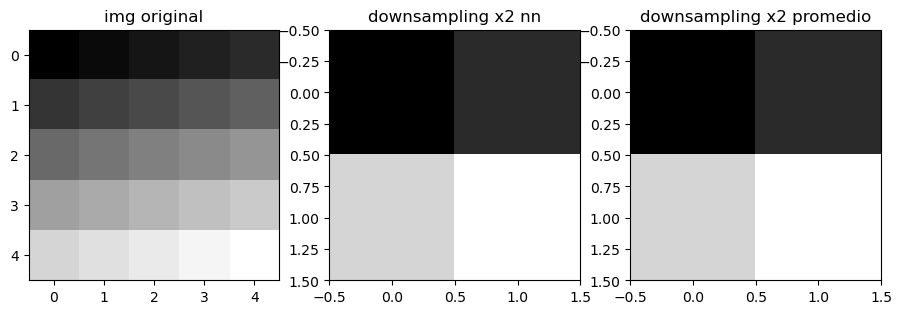

In [3]:
#%% ------------------- Downsampling cada 2 pixeles -------------------------
img_test = np.reshape(np.arange(0,25),(5,5)); img_test = img_test/img_test.max();
img_gray = imageio.imread('imageio:camera.png')/255
img = img_test

fig, ax = plt.subplots(1, 3, figsize=(11,4))
ax[0].imshow(img,'gray');       ax[0].title.set_text('img original')

print('downsampling nn')
img_out2 = muestreo_downx2(img,'nn');
ax[1].imshow(img_out2,'gray');   ax[1].title.set_text('downsampling x2 nn')

print('downsampling promedio')
img_out3 = muestreo_downx2(img,'promedio');
ax[2].imshow(img_out3,'gray');   ax[2].title.set_text('downsampling x2 promedio')


upsampling bilineal
min y max de img_out: 0.0 y  1.0 

upsampling bicubica
min y max de img_out: 0.0 y  1.1601562499999998 



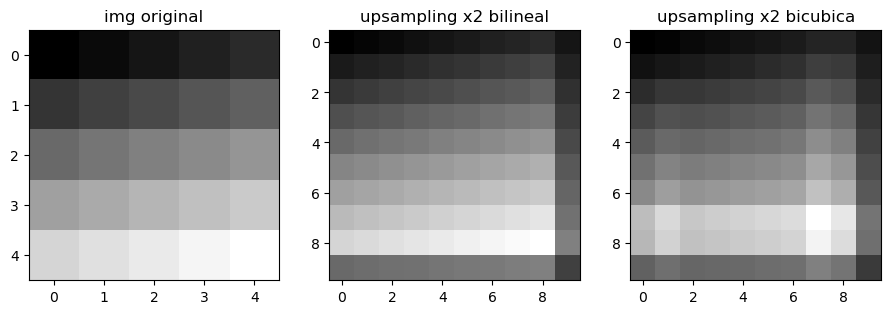

In [4]:
# ------------------- Upsampling cada 2 pixeles -------------------------
fig, ax = plt.subplots(1, 3, figsize=(11,4))
ax[0].imshow(img,'gray');       ax[0].title.set_text('img original')

print('upsampling bilineal')
img_out2 = muestreo_upx2(img,'bilineal');
ax[1].imshow(img_out2,'gray');   ax[1].title.set_text('upsampling x2 bilineal')

print('upsampling bicubica')
img_out3 = muestreo_upx2(img,'bicubica');
ax[2].imshow(img_out3,'gray');   ax[2].title.set_text('upsampling x2 bicubica')

# Práctico 7 - Procesamiento Digital de Imágenes
3. Cuantización
Cuantizar los niveles de grises de la imagen utilizando los siguientes métodos:

Cuantización uniforme
Difusión del error por scan-line
Dithering de Flojd-Steinberg

cuantizacion uniforme - 2 niveles
cuantizacion difusion - 2 niveles
cuantizacion Floyd-Steinberg - 2 niveles


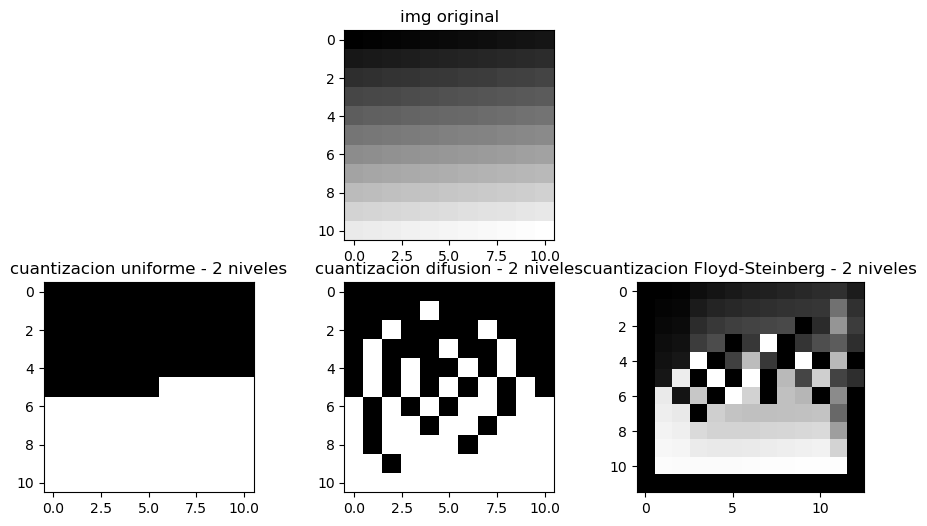

In [5]:
def cuantización(img,niveles):
    img_out = np.round((niveles-1)*img)/(niveles-1)
    return img_out

def cuantización_difusion(img,niveles):
    (r,c)=img.shape;
    img = (niveles-1)*img
    img_out = np.zeros((r,c));
    for i in range(r):
        error=0;
        for j in range(c):
            pxl_cuant = round(img[i,j]+error)
            img_out[i,j] = pxl_cuant;
            error = error + (img[i,j]- pxl_cuant) ;
    return img_out/(niveles-1)

def cuantización_floid_stein(img,niveles):
    (r,c)=img.shape;
    img = (niveles-1)*img
    img_pad = np.pad(img,((0,1),(1,1)), 'constant', constant_values=(0, 0))
    kernel=(1/16)*np.array([[0,0,7],[3,5,1]])

    for i in range(r):
        for j in range(c):
            pxl_quant = round(img_pad[i+1,j])
            error = img_pad[i+1,j] - pxl_quant;
            img_pad[i+1,j] = pxl_quant;
            patch = img_pad[i:i+2,j:j+3];
            #print('kernel \n ',kernel, kernel.shape)
            #print('patch \n ',patch, patch.shape)
            img_pad[i:i+2,j:j+3] = patch + error*kernel                      
            
    return img_pad/(niveles-1)

## ----------------------------------------------------
img_test = np.reshape(np.arange(0,121),(11,11)); img_test = img_test/img_test.max();
img_gray = imageio.imread('imageio:camera.png')/255
img = img_test

fig, ax = plt.subplots(2, 3, figsize=(11,6))
ax[0][0].axis('off'); ax[0][2].axis('off')
ax[0][1].imshow(img,'gray',vmin=0,vmax=1);
ax[0][1].title.set_text('img original')

M= 2;
print('cuantizacion uniforme - '+ str(M) + ' niveles') 
img_out2 = cuantización(img,M);
ax[1][0].imshow(img_out2,'gray',vmin=0,vmax=1);
ax[1][0].title.set_text('cuantizacion uniforme - '+ str(M) + ' niveles')

#M= 5;
print('cuantizacion difusion - '+ str(M) + ' niveles') 
img_out3 = cuantización_difusion(img,M);
ax[1][1].imshow(img_out3,'gray',vmin=0,vmax=1);
ax[1][1].title.set_text('cuantizacion difusion - '+ str(M) + ' niveles')

print('cuantizacion Floyd-Steinberg - '+ str(M) + ' niveles') 
img_out4 = cuantización_floid_stein(img,M);
ax[1][2].imshow(img_out4,'gray',vmin=0,vmax=1);
ax[1][2].title.set_text('cuantizacion Floyd-Steinberg - '+ str(M) + ' niveles')

cuantizacion uniforme - 2 niveles
cuantizacion difusion - 2 niveles


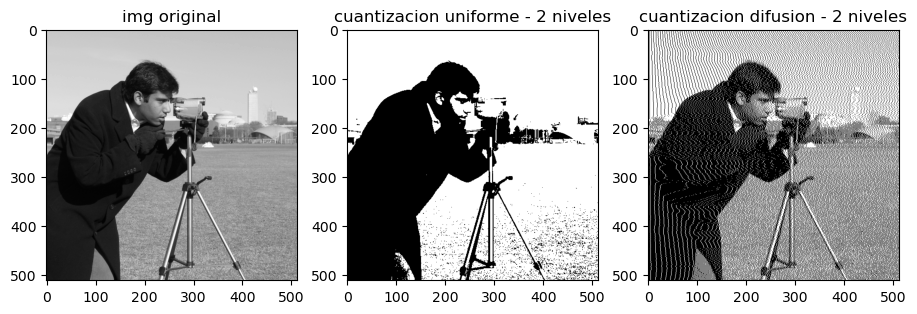

In [6]:
img = img_gray
fig, ax = plt.subplots(1, 3, figsize=(11,4))
ax[0].imshow(img,'gray',vmin=0,vmax=1);
ax[0].title.set_text('img original')

M= 2;
print('cuantizacion uniforme - '+ str(M) + ' niveles') 
img_out2 = cuantización(img,M);
ax[1].imshow(img_out2,'gray',vmin=0,vmax=1);
ax[1].title.set_text('cuantizacion uniforme - '+ str(M) + ' niveles')

#M= 5;
print('cuantizacion difusion - '+ str(M) + ' niveles') 
img_out3 = cuantización_difusion(img,M);
ax[2].imshow(img_out3,'gray',vmin=0,vmax=1);
ax[2].title.set_text('cuantizacion difusion - '+ str(M) + ' niveles')

cuantizacion difusion - 2 niveles
cuantizacion Floyd-Steinberg - 2 niveles


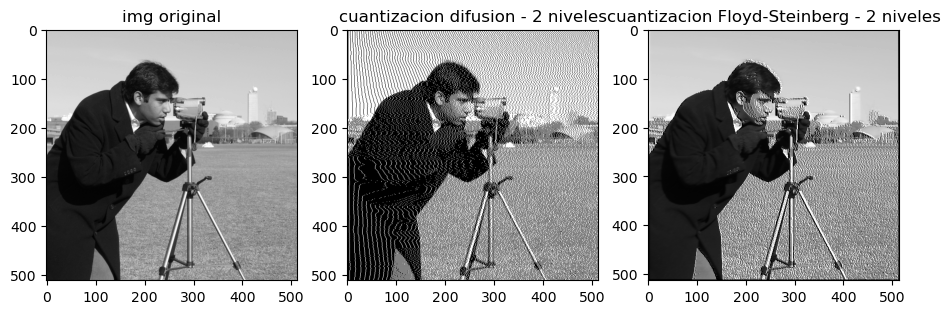

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(11,4))
ax[0].imshow(img,'gray',vmin=0,vmax=1);
ax[0].title.set_text('img original')

M= 2;
print('cuantizacion difusion - '+ str(M) + ' niveles') 
img_out2 = cuantización_difusion(img,M);
ax[1].imshow(img_out2,'gray',vmin=0,vmax=1);
ax[1].title.set_text('cuantizacion difusion - '+ str(M) + ' niveles')
#M= 5;
print('cuantizacion Floyd-Steinberg - '+ str(M) + ' niveles') 
img_out3 = cuantización_floid_stein(img,M);
ax[2].imshow(img_out3,'gray',vmin=0,vmax=1);
ax[2].title.set_text('cuantizacion Floyd-Steinberg - '+ str(M) + ' niveles')